 <img src = 'https://drive.google.com/uc?id=1cPtoRUIVZ2jWaiIl8z1fm4R4V3kwQfZh
' width="170" height="190" align = "left">
# <font color = "green" > <b>Obiective</b></font> 
Prin parcurgerea acestui capitol  :

*   veți întelege ce este regresia şi în particular veți învăța despre regresia liniară
*   veți implementa regresia liniară în Python
*   veţi utiliza Excel pentru regresie liniară
*   veți analiza comparativ regresia și clasificarea, ambele fiind tehnici de învățare supervizată




 |  |
 |---------|
 |<img src='https://drive.google.com/uc?id=1HV8Tdtn20fD2wdlz1hXrFRvgyQ-ZATIv' width="550"  ><figcaption align = "center"> |

Utilitatea Regresiei

De obicei, ai nevoie de regresie dacă vrei să știi cum un fenomen îl influențează pe altul, sau când încerci să faci o predicție pentru o valoare încă necunoscută.
De exemplu poţi folosi regresia pentru a prezice:
*  cât de mult notele la examene influențează salariul pe care o sa îl ai în viitor.
* câtă electricitate o să consume orașul tău în următoarea oră pe baza temperaturii de afară, a zilei și a orei.
* valoarea unei case în funcție de suprafața ei.
* tensiunea arterială a unui pacient/unei paciente în funcție de dozajul unui medicament prescris de medic.

**Observație:** Diferența dintre regresie și clasificare ține de formatul datelor de ieșire. Pentru clasificare scopul e să atribuim fiecărui exemplu o eticheta dintr-un set finit și fix de etichete. Pentru regresie scopul este de a descoperi relația dintre diferite cantitați, datele de ieșire fiind numere reale.

<img src = 'https://drive.google.com/uc?id=1jEejbOFGv_0IMqcKDrD2ro1q4_OV7BYX' align = "center"><figcaption align = "center"> Figura 1. Exemple de utilizare a regresiei</figcaption>




# Bibliotecile ***numpy*** și ***matplotlib***

In [ ]:
# We import numpy, which is a scientific library for python.
import numpy as np
# We also import matplotlib, which is a useful plotting library for python.
import matplotlib.pyplot as plt

#Definirea funcțiilor utile

In [ ]:
# Helper functions
def plot_observed_vs_predicted(x, y, y_hat, theta_hat):
  """ Plots the observed vs the predicted data.

  Args:
      x (ndarray): observed x values.
      y (ndarray): observed y values.
      y_hat (ndarray): predicted y values.
      theta_hat (float): slope parameter calculated.

  """
  fig, ax = plt.subplots()
  ax.scatter(x, y, label='Observed')  # our data scatter plot
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
  ax.set(
      title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {mse(x, y, theta_hat):.2f}",
      xlabel='x',
      ylabel='y'
  )
  ax.legend()

def generate_data(slope=1.0, intercept=0.0, n_samples=20):
  """ Generates some simulated data.

  Args:
      slope (float): the slope of the line.
      intercept (float): the intercept of the line.
      n_samples (int): observed y values.

  Returns:
      x (ndarray): the featues (inputs).
      y_perfect (ndarray): the perfect responses, without any noise.
      y (ndarray): the responses (outputs), containing noise.
  """
  
  # We obtain x, the features (or inputs) of the problem, by drawing samples
  # from a uniform distribution over the interval [0,9).
  x = 9 * np.random.rand(n_samples)

  # We obtain y_perfect response as the linear relationship: theta * x.
  # This represents the perfect, deterministic response.
  y_perfect = slope * x + intercept

  # However, we know that this is rarely the case in real life.
  # There is no perfect relationship between x and y. This means that
  # sleeping 7 hours does not guarantee me a grade of 9. To model a more 
  # realistic relationship, we need to add some noise to y_perfect.
  noise = np.random.randn(n_samples)  # sample from a standard normal distribution
  # To model a realistic relationships  between x and y, we add noise.
  y = y_perfect + noise
  return x, y_perfect, y

def plot_observed(x, y):
  """Plots the observed relationship between the input-output data.

  Args:
      x (ndarray): the features.
      y (ndarray): the responses.
  """
  fig, ax = plt.subplots()
  ax.scatter(x, y)  # produces a scatter plot
  ax.set(
      xlabel='Număr de ore dormite înainte de examen',
      ylabel='Nota obținută la examen', xlim=(0, 9.1), ylim=(0, 10.3))
  ax.set_xticks(np.arange(0, 11, 2))
  ax.set_yticks(np.arange(0, 11, 1))

## Exemplu practic
*Să luăm următorul exemplu:* un profesor vrea să identifice cei mai importanți factori care îi influențează pe elevi să ia note mari la examene. El crede că unul din acești factori ar putea fi numărul de ore dormite în noaptea premergătoare examenului.

Așa că, la următorul examen, își întreabă fiecare elev câte ore a dormit în noaptea precedentă. Acest număr se numește *observație* sau *proprietate a datelor de intrare* (feature sau input). Apoi, asociază fiecare *observație* cu nota obținută la examen de către elevul respectiv. Această notă se numește *obiectivul predicției* (target).

Profesorul schițează grafic acest set de date.

Prin execuția codului de mai jos, se obţine reprezentarea grafică a unui set de date format din 20 de exemple ipotetice în care fiecare punct corespunde unei perechi formată din:
* numărul de ore dormite înainte de examen (*input*), pe axa OX
* nota obținută la examen (*target*), pe axa OY

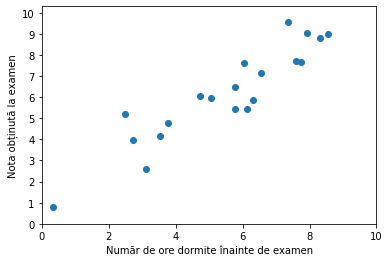

In [ ]:
 #Execute this cell to generate some data and then plot it.

# Generate some simulated data.
x, y_perfect, y = generate_data(slope=0.8, intercept=1.8, n_samples=20)

# Plots the observed data. Features on x-axis, responses on y-axis. 
plot_observed(x, y)

Profesorul ar vrea acum să afle care este *relația* dintre numărul de ore dormite și notele elevilor.

 Se poate presupune că elevii care sunt odihniți la examen vor avea capacitatea de concentrare mai mare și, astfel, vor avea o performanță mai bună. 
Dar putem ști cu siguranță dacă acest lucru e adevărat❓

Altfel spus: dacă știm câte ore a dormit un elev înainte de examen, putem prezice ce notă va lua❓






Din punct de vedere matematic, un mod de a răspunde la aceste întrebări ar fi să găsim o funcție matematică $f$ care asociază fiecare *observație* $x$ cu *obiectivul predicției* $y$ corespunzător.

Pentru început, haideți să analizăm 3 funcții matematice des întâlnite și să vedem cât de bine redau relația dintre datele elevilor. 

Executând codul de  mai jos avem reprezentarea grafică a acestor funcții pentru datele corespunzătoare celor 20 elevi

1. În primul grafic avem o funcție logaritmică $f(x) = b{\times}log_a(x)$.
2. În al doilea grafic avem o funcție liniară $f(x) = ax + b$.
3. În al treilea grafic avem o funcție polinomială $f(x) = ax^2 + bx + c$. 

(unde $a, b, c$ sunt niște constante pe care le putem ignora momentan).

* Analizați graficele obținute
* Care funcție credeți că redă cel mai bine relația dintre numărul de ore dormite și notele elevilor❓

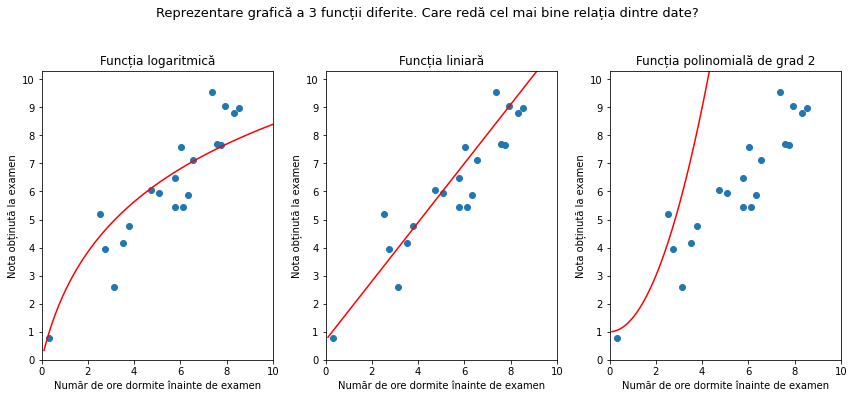

In [ ]:
#  Execute this cell to plot 3 possible functions fitting the data.

def logarithmic(xs, scale=1.0, rate=1.0, x0=0.0):
  ys = scale * np.log(rate * (xs - x0))
  return ys


def linear(xs, slope=3.0, intercept=-4.3):
  ys = slope * xs + intercept
  return ys


def quadratic(xs, slope=0.5, intercept=-0.5):
  ys = slope * (xs ** 2) + intercept
  return ys


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle('Reprezentare grafică a 3 funcții diferite. Care redă cel mai bine relația dintre date?', 
             size=13, y=1.1)

x_ = np.linspace(0.1, 10, 100)

# Logarithmic
log_y = logarithmic(x_, scale=3.5, rate=1.0, x0=-1)
ax1.scatter(x, y, label='data points')
ax1.plot(x_, log_y, color='red')
ax1.set(title='Funcția logaritmică', label='f(x) = clog(ax+b)',
       xlabel='Număr de ore dormite înainte de examen', 
       ylabel='Nota obținută la examen', xlim=(0, 9.1), ylim=(0, 10.3))
ax1.set_xticks(np.arange(0, 11, 2))
ax1.set_yticks(np.arange(0, 11, 1))

# Linear
linear_y = linear(x_, slope=1.05, intercept=0.7)
ax2.scatter(x, y, label='data points')
ax2.plot(x_, linear_y, color='red')
ax2.set(title='Funcția liniară', label='f(x) = ax+b',
       xlabel='Număr de ore dormite înainte de examen', 
       ylabel='Nota obținută la examen', xlim=(0, 9.1), ylim=(0, 10.3))
ax2.set_xticks(np.arange(0, 11, 2))
ax2.set_yticks(np.arange(0, 11, 1))

# Logarithmic
quadratic_y = quadratic(x_, slope=0.5, intercept=1.0)
ax3.scatter(x, y, label='Data points')
ax3.plot(x_, quadratic_y, color='red')
ax3.set(title='Funcția polinomială de grad 2', label='f(x) = ax^2 + b',
       xlabel='Număr de ore dormite înainte de examen',
       ylabel='Nota obținută la examen', xlim=(0, 9.1), ylim=(0, 10.3))
ax3.set_xticks(np.arange(0, 11, 2))
ax3.set_yticks(np.arange(0, 11, 1))

plt.tight_layout(pad=1.2)
plt.show()

Dacă ați intuit că funcția liniară redă cel mai bine relația dintre numărul de ore dormite și notele elevilor, altfel spus aproximează cel mai bine datele, aveți dreptate. 

Cum ați gândit❓ 

Probabil v-ați uitat la *funcția care trece prin cât mai multe puncte și care e foarte aproape de punctele prin care nu trece.*

Desigur, niciuna dintre cele 3 funcții nu redă cu exactitate  relația dintre numărul de ore dormite și notele elevilor. Dar funcția liniară le aproximează cel mai bine. 





Să analizăm funcția liniară:

$f(x) = ax + b$,   unde $a$ și $b$ sunt constante sau parametri ai funcției. 

Pentru simplificare, vom nota $y = f(x)$.

În exemplul nostru legat de elevi, $x$ este numărul de ore dormite și $f(x)$ este nota obținută la examen.

În regresia liniară, $f(x) = ax + b$, nu cunoaștem constantele (parametrii) $a$ și $b$. În schimb, ni se dă o mulțime de perechi $(x_i, y_i)$ care reprezintă "setul nostru de date" și învățarea automată, în acest context, înseamnă să aflăm constantele $a$ și $b$ astfel încât funcția să aproximeaze cel mai bine datele. 

Astfel, ulterior vom putea estima $y_i$ (nota la examen) și pentru alte valori $x_i$ inexistente în setul de date (alte numere de ore de somn dormite în noaptea premergătoare examenului).

Dacă *relația* dintre date ar fi "perfect liniară", executând codul de mai jos, graficul care arată *relația* dintre orele dormite și notele obținute la examen ar arăta astfel:

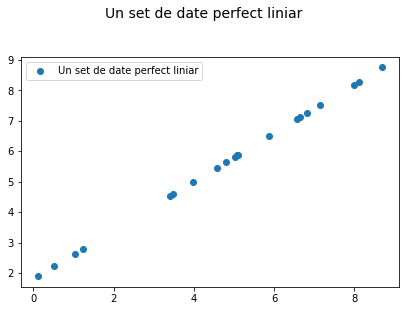

In [ ]:
# Execute to plot the perfectly linear data points
fig, ax = plt.subplots()
fig.suptitle('Un set de date perfect liniar', size=14, y=1.1)

# Linear
ax.scatter(x, y_perfect, label='Un set de date perfect liniar')
plt.legend()
plt.tight_layout(pad=2.0)
plt.show()

Dacă setul nostru de date ar arăta așa în viața reală, ar fi extrem de ușor să găsim funcția liniară care aproximează cel mai bine datele. Tot ce ar trebui să facem e să trasăm o dreaptă care trece prin toate punctele, ca în graficul de mai jos. 

Prin urmare, am putea prezice cu acuratețe de 100% ce notă va obține un elev dacă știm câte ore a dormit înainte de examen.

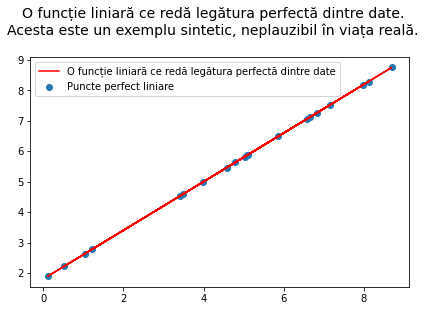

In [ ]:
# Execute to plot the linear function on top of the perfectly linear data points
fig, ax = plt.subplots()
fig.suptitle(
    'O funcție liniară ce redă legătura perfectă dintre date.\n'
    'Acesta este un exemplu sintetic, neplauzibil în viața reală.', 
    size=14, y=1.1)

# Linear
linear_y = linear(x, slope=0.8, intercept=1.8)
ax.scatter(x, y_perfect, label='Puncte perfect liniare')
ax.plot(x, linear_y, color='red', label='O funcție liniară ce redă legătura perfectă dintre date')
plt.legend()
plt.tight_layout(pad=2.0)
plt.show()

## Determinarea funcției de regresie liniară
Deși în viața reală, datele **nu sunt perfect liniare**, putem presupune că datele sunt **aproximativ liniare**.
Astfel, **REGRESIA LINIARĂ**, este o metodă de a determina parametrii $a$ și $b$ astfel încât funcția $f(x) = ax + b$  să aproximeze cât mai bine posibil setul de date. Spus altfel, când facem regresie lineară, începem prin a presupune ca relația între date e aproximativ lineară, si metoda ne ajută să găsim cea mai bună funcție lineara pentru datele noastre. Dacă presupunem ca relația între date nu e lineară, atunci această metodă nu ne poate ajuta.

Să recapitulăm:
* avem o funcție de forma $f(x) = ax + b$ 
* știm un set de valori $x_i$ și $y_i$ (în exemplul nostru $x_i$ reprezintă câte ore a dormit elevul $i$ înainte de examen și $y_i$ reprezintă ce notă a obținut acest elev la examen)
* trebuie să determinăm $a$ și $b$ astfel încât $y_i ≈ a x_i + b$, astfel spus graficul funcției $f$ să aproximeze cât mai bine relația dintre *feature-uri* și *target-uri*. 

Graficul funcției $f$ se numește **linie de regresie**.

Înainte de a rezolva matematic această problemă, lansăm provocarea de a  găsi, prin încercări, în graficul interactiv de mai jos, cele mai bune valori pentru $a$ (slope) și $b$ (intercept) astfel încât să se obțină o linie de regresie care aproximează datele cel mai bine.

In [ ]:
# Run cell to enable widget. 
#Modify the values for the slope (a) and the intercept (b) in the linear function f(x) = ax + b so that f best fits the data points.
# No need to understand the code below! It's to setup an interactive plot.
import ipywidgets as widgets

xs = np.linspace(0, 10, 100)

def refresh(slope=3.0, intercept=-5.0):
  plt.scatter(x, y, label='Puncte asociate datelor observate')
  plt.xlim(0, 9)
  plt.ylim(0, 11)
  ys = linear(xs, slope=slope, intercept=intercept)
  plt.plot(xs, ys, lw=3, color='red', 
           label=f'f(x) = {slope} * x + {intercept}')
  plt.title('Aproximarea datelor reale printr-o funcție liniară', size=13)
  plt.legend()
  plt.tight_layout(pad=2.0)
  plt.show()


_ = widgets.interact(
    refresh, slope=(-2, 5, 0.5), intercept=(-5, 5, 0.25))

interactive(children=(FloatSlider(value=3.0, description='slope', max=5.0, min=-2.0, step=0.5), FloatSlider(va…

## Eroarea medie
Probabil ați observat că pentru valori diferite ale constantelor $a$ si $b$ rezultă linii de regresie diferite.

Pe baza încercărilor din graficul de mai sus, ce caracteristici ați observat la o linie de regresie bună❓ 

În termeni simpli, am putea spune că o linie de regresie bună este "cât mai aproape" de majoritatea punctelor. 

În termeni matematici, cea mai bună linia de regresie este aceea care are cea mai mică distanță dintre punctele de pe grafic (date reale) și linia regresiei (predicție).

Cea mai folosită formulă de calcul a acestei diferențe se numește **eroarea pătratică medie**  (**Mean Squared Error**) 

>$eroare\_medie = \frac{1}{n}\sum_{i=1}^{n}{(y_i  - (ax_i + b))^2}$


unde $n$ este numărul de puncte $(x_i, y_i)$ ce corespund unor date reale

Haideți să punem în practică această formulă pentru exemplu nostru.

Fie punctul $(x_i, y_i)$ ce corespunde unui elev
* elevul a dormit $x_i$ ore înainte de examen și a obținut nota $y_i$
* predicția dată de funcția de regresie $f(x) = a x + b$ este că nota de la examen ar fi $a x_i + b$
* apare diferența  $y_i - (a x_i + b)$ care poate fi pozitivă sau negativă
* practic, s-a constatat că, pentru a evita valorile negative, este de preferat să utilizăm pătratul diferenței 

> $eroare = (y_i  - (ax_i + b))^2$

* având $n$ puncte de forma $(x_i, y_i)$ provenite din observații reale, eroarea medie se obține ca medie aritmetică a erorii fiecărui punct

>$eroare\_medie = \frac{1}{n}\sum_{i=1}^{n}{(y_i  - (ax_i + b))^2}$.

Executând codul de mai jos se determină eroarea pătratică medie (MSE sau Mean Squared Error) pentru 3 linii diferite de regresie.

In [ ]:
def mse(x, y, slope, intercept=0.0):
  """Computes the mean squared error.

  Args:
    x (ndarray): An array of shape (num_examples,) that contains the features.
    y (ndarray): An array of shape (num_examples,) that contains the responses.
    slope (float): An estimate of the slope parameter.
    intercept (float): An estimate of the intercept parameter.

  Returns:
    float: The mean squared error of the data with the estimated parameter.
  """
  #### FOR THE STUDENTS TO IMPLEMENT ####
  # Compute the estimated y.
  y_hat = slope * x + intercept

  # Compute the mean squared error.
  mse = np.mean((y - y_hat) ** 2)
  return mse

# Plot different linear estimations and their associated mean squared error.
a_values = [0.5, 1.0, 1.5]
b_values = [1.0, 0.0, 2.0]
for a, b in zip(a_values, b_values):
  print("a=%.2f, b=%.2f => MSE (eroare medie) = %.2f" % (a, b, mse(x, y, slope=a, intercept=b)))

a=0.50, b=1.00 => MSE (eroare medie) = 4.54
a=1.00, b=0.00 => MSE (eroare medie) = 1.61
a=1.50, b=2.00 => MSE (eroare medie) = 19.88


Executând codul de mai jos se vizualizează eroare medie (MSE sau Mean Squared Error) pentru 3 linii diferite de regresie.

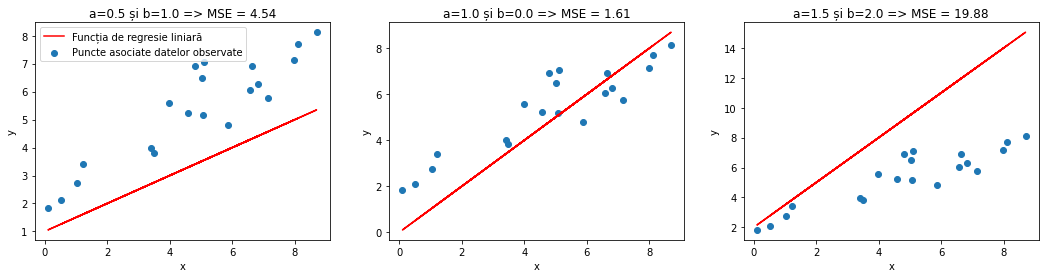

In [ ]:


# Execute this cell to visualize the estimated models.

fig, axes = plt.subplots(ncols=3, figsize=(18, 4))
for a, b, ax in zip(a_values, b_values, axes):

  # True data
  ax.scatter(x, y, label='Puncte asociate datelor observate')  # our data scatter plot

  # Compute and plot predictions
  y_hat = a * x + b
  ax.plot(x, y_hat, color='r', label='Funcția de regresie liniară')  # our estimated model

  ax.set(
      title= fr'a={a} și b={b} => MSE = {mse(x, y, a, b):.2f}',
      xlabel='x',
      ylabel='y'
  );

axes[0].legend()
plt.show()

Prin urmare, pornind de la setul nostru de date, determinăm $a$ și $b$ astfel încât $eroarea\_medie$ să fie minimă.

De la analiză matematică, știm că pentru a determina minimul unei funcții trebuie să îi calculăm derivata și să aflăm în ce punct este egală cu 0. 

Dacă notăm:

\begin{align}
&\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i \\
&\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i
\end{align}

obţinem
\begin{align}
a = \frac{\sum_{i=1}^n\left(y_ix_i - \bar{y}\bar{x}\right)}{\sum_{i=1}^n \left(x_i^2 - \bar{x}^2\right)}
\end{align}

şi
\begin{align}
b = \bar{y} - a\bar{x}
\end{align}


[Demonstrația completă este aici](#mate)


Cu valorile pentru $a$ și $b$ obținute avem funcția $f(x) = a x + b$ cu 
cea mai bună linie de regresie, pentru care eroarea medie e minimă!

Executând codul de mai jos, reprezentăm grafic cea mai bună linie de regresie pentru datele noastre, utilizând valoarea lui $a$ și $b$ determinată mai sus:


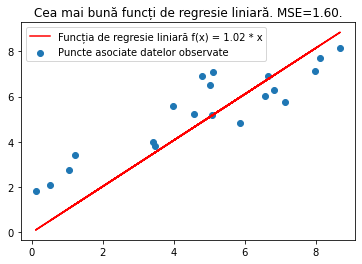

In [ ]:
def linear_regression(x, y):
  """Solve the normal equations to produce the value of the slope that minimizes
    mean squared error.

    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    float: the value for theta_hat arrived from minimizing MSE
  """
  #### For students to implement ####
  numerator = np.sum(x * y)
  denominator =  np.sum(x ** 2)
  slope = numerator / denominator
  return slope

# Calculate the slope
slope = linear_regression(x, y)

# Plot the observed data points and the estimated function.
plt.scatter(x, y, label='Puncte asociate datelor observate')
plt.title('Cea mai bună funcți de regresie liniară. MSE=%.2f.' % mse(x, y, slope))
plt.plot(x, slope * x, label='Funcția de regresie liniară f(x) = %.2f * x' % slope, color='r')
plt.legend()
plt.show()

Acum avem o metodă completă de a calcula Regresia Liniară, prin care putem prezice valoarea oricărui $f(x)$ pe baza observațiilor $(x_i, y_i)$ din setul nostru de date.

Până acum ne-am uitat la a face Regresie Liniară cu *observații* uni-dimensionale, adica $x$ fiind un numar real. În următoarea secțiune vom explora cum putem să facem regresie liniară atunci când avem *observați* multi-dimensionale.

# Regresie Liniară Multiplă
În exemplul nostru, am creat un model care poate să prezică nota unui elev în examen doar pe baza numărului de ore dormite în noaptea dinaintea examenului. 

Este evident însă că numărul de ore dormite nu e singura observație (*feature*) care influențează rezultatul la examen. Cu siguranță ar trebui să fie și numărul de ore de studiu ce poate fi considerat ca al doilea *feature*.

Așadar, pentru fiecare student $i$, datele de intrare vor avea două observații: $x_{i_1}$, ce reprezintă numărul de ore dormite și $x_{i_2}$, care e numărul de ore de studiu.

Metoda care identifică relația dintre date ce au două sau mai multe feature-uri se se numește **Regresie Liniară Multiplă** (Multiple Linear Regression)

Pentru 2 observații (feature-uri) $x_{i_1}$ și $x_{i_2}$, funcția de regresie este:

$f(x_1, x_2) = a + bx_1 + cx_2$.

În timp ce graficul Regresiei Liniare este o dreaptă într-un plan 2D, graficul Regresiei Liniare Multiple în acest caz este reprezentat de un plan într-un spațiu 3D. 

Exact cum am arătat mai sus, obiectivul Regresiei este să găsească valorile optime pentru constantele $a$, $b$, $c$ (care se mai numesc și parametri), pentru care planul respectiv să fie cât mai aproape de setul nostru de date 3D. Adică, eroarea pătratică medie (Mean Squared Error) să fie cât mai mică. Ca și în cazul regresiei lineare, și în acest caz cu două sau mai multe dimensiuni se poate obține o formulă pentru a calcula parametrii optimi. Procesul este similar, doar că este mai complicat. 




# Regresie Non-Liniară

Până acum am discutat despre modele de Regresie Liniară, în care relația dintre input şi output este aproximativ liniară. 

Dar dacă avem alte relații, precum exponențială (spre exemplu, când input-ul crește cu 1, output-ul se multiplică cu $e$) sau logaritmică? 

În aceste cazuri, modelul de Regresie Liniară nu va putea niciodată să aproximeze datele cum trebuie. Din fericire, există multe metode parametrice de Machine Learning care pot rezolva această problemă, dar care nu vor fi prezentate în acest curs.

In principiu aceste metode presupun o formă diferită pentru funcția $f$ care reflectă mai bine relația dintre observații şi obiectivul regresiei. Da, ca și în cazul formei lineare, aceste funcții vor depinde de un set de constante sau parametri care trebuie determinați pe baza setului de date de antrenare. In cazul non-linear, de cele mai multe ori, nu putem obține o formulă pentru a afla acești parametri ci trebuie sa folosim un algoritm iterativ pentru a-i descoperi. Cel mai popular algoritm, *gradient descent* utilizează derivata funcției, deci conceptul de derivare este esențial pentru a rezolva astfel de probleme.

#Rezumat


În acest capitol am învățat despre **regresie**, ca tehnică de învățare supervizată ce  analizează setul nostru de date pentru a aproxima relația dintre observații și valoarea care vrem sa o asociem fiecărei observații. Pentru regresie, datele de iesire sunt o valoare numerică, precum temperatură, greutate, timp, preț etc. 
În comparație cu *clasificarea*, în care fiecărei observații îi atribuim o etichetă, dintr-un set fix și finit de posibile valori, cum ar fi naționalitatea, tipuri de boala, cifra (0-9), etc. Ambele metode aparțin învățarii supervizate, iar observațiile pot fi de orice tip (discrete, continue, categorice..).




# Știați că în Excel...
* avem funcția **FORECAST.LINEAR(x; known_ys; known_xs)**
care calculează sau prezice o valoare viitoare de-a lungul liniei de regresie utilizând valorile existente 
* poate fi reprezentată direct **linia de regresie (trendline)** pentru un set de date de antrenament

 <img src = 'https://drive.google.com/uc?id=1QBt0gOS0h0itKWF9Ok08Q99sfNMwAIOJ
' width="10%" align = "center">

Care este predicția pentru consumul lunar de apă  pentru următoarele $k$ luni știind volumul de apă consumată în ultimele $n$ luni într-un oraș❓

Vom folosi Google Sheets pentru a face această predicție

**Pas 1.** Scriem setul de date de antrenament (ca in exemplul de mai jos)

| Luna  | Consum de apă |
|:-----:|:-------------:|
|   1   |      7,2      |
|   2   |      6,8      |
|   3   |       8       |
|   4   |       7       |
|   5   |      8,9      |
|   6   |      9,2      |
|   7   |      7,3      |

**Pas 2.** Inserăm un grafic de tip ***Diagramă cu puncte*** (***Scatter Chart***)

 <img src = 'https://drive.google.com/uc?id=1yMEY1no5ODIKUaDjfIlVAu8ZDQsuOhxs
'  align = "center">


**Pas 3.** Personalizăm diagrama adăugând ***linia de regresie*** (***trendline***)

 <img src = 'https://drive.google.com/uc?id=1zDPzDgzC9gKBx4dfkYkHjgKPuEuD5FR1
'  align = "center">



**Pas 4.** Completăm coloana ***Luna*** cu $k$ luni pentru care vom prezice consumul de apă. Corespunzător, în coloana ***Consum de apă*** adăugăm formula de calcul  **FORECAST.LINEAR(x; known_ys; known_xs)**

 <img src = 'https://drive.google.com/uc?id=1jYuDcykLr8d26vi6mI7RAbpXQtDS4Uz-
'  align = "center">



#Mai mult 


<a name="mate"></a>
## Determinarea funcției de regresie liniară

Fie $f(x)=ax+b$ , unde  $a$ și $b$  sunt constante sau parametri ai funcției.

Vom determina $a$ și $b$ astfel încât eroarea pătratică medie $\frac{1}{n}\sum_{i=1}^{n}{(y_i  - (ax_i + b))^2}$ să fie minimă.

Prin urmare, calculăm derivata și aflăm pentru ce valori a lui $a$ și $b$ este egală cu 0.

Mai exact, considerăm eroarea medie mai întâi ca o funcție în $b$, $f(b) = \frac{1}{n}\sum_{i=1}^{n}{(y_i  - (ax_i + b))^2}$ şi calculăm derivata $f'(b)$ fața de necunoscuta $b$.  Această derivata trebuie sa fie $0$: 

$$ f'(b) = \frac{1}{n}\sum_{i=1}^n 2(y_i - (ax_i +b)) = 0 $$

In același timp ne uităm la eroarea medie ca o funcție în $a$, $f(a) =\frac{1}{n}\sum_{i=1}^{n}{(y_i  - (ax_i + b))^2}$ și îi calculăm derivata $f'(a)$ fața de necunoscuta $a$. Și această derivată trebuie să fie $0$ pentru a obține eroarea minimă:

$$ f'(a) = \frac{1}{n}\sum_{i=1}^n 2(y_i - (ax_i +b))x_i = 0 $$

**Observații**. Pentru calculul derivatelor, am folosit următoarele formule învățate la ora de matematică:


| -------------- Funcție $h(x)$ -------------- | -------------- Derivata lui $h(x)$ --------------                     |
-------------------------------------------------|--------------------------------|
|$ h(x) = a\cdot f(x) + b\cdot g(x) \Rightarrow$ | $ h'(x) = a\cdot f'(x) + b\cdot g'(x)) $ |
|$ h(x) = (f(x))^2 \Rightarrow$                  | $ h'(x) = 2f(x) f'(x) $               |
|$ h(x) = x \Rightarrow$                         | $ h'(x) = 1 $                  |


*Derivabilitatea reprezintă un concept extrem de folositor în inteligența artificială. Derivatele pot fi folosite pentru a găsi minimum unei funcții (cum este și cazut curent), sau pentru a aproxima o funcție arbitrară într-o regiune restrânsă a domeniului de definiţie cu o funcție liniara sau o funcție de gradul 2.* 

Dacă ne întoarcem la problema noastră, avem două ecuații cu două necunoscute, ceea ce înseamnă ca putem rezolva sistemul și descoperi valorile lui $a$ și $b$:
\begin{align}
&f'(b) = \frac{1}{n}\sum_{i=1}^n 2(y_i - (ax_i +b)) = \frac{2}{n} \left(\sum_{i=1}^n (y_i - ax_i)\right) - 2b =0 \\
&f'(a) = \frac{1}{n}\sum_{i=1}^n 2(y_i - (ax_i +b))x_i = \frac{2}{n}\left(\sum_{i=1}^n x_iy_i -b\sum_{i=1}^n x_i - a\sum_{i=1}^n x_i^2\right) = 0
\end{align}

Pentru a simplifica notația, haideți să facem următoarele substituții:
\begin{align}
&\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i \\
&\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i
\end{align}

Acum obţinem următoarea formulă pentru $f'(b)$:
\begin{align}
&f'(b) = 2\bar{y} -2a\bar{x} -2b = 0
\end{align}

De unde rezultă că:
\begin{align}
b = \bar{y} - a\bar{x}
\end{align}



Acum haideți să ne uităm la $f'(a)$. Avem:

\begin{align}
& f'(a) = \frac{2}{n}\sum_{i=1}^n y_ix_i - \frac{2a}{n}\sum_{i=1}^nx_i^2 - 2b\bar{x} = 0 \Rightarrow\\
&\Rightarrow a \frac{2}{n}\sum_{i=1}^n x_i^2 = \frac{2}{n}\sum_{i=1}^n y_ix_i-2b\bar{x}
\end{align}

Ca și în cazul precedent am scăzut termenul care conține necunoscuta de interes $a$. Acum putem impărți ambele părți ale ecuației prin $2$ și înlocuim valoarea lui $b$ avem: 
\begin{align}
a \frac{1}{n}\sum_{i=1}^n x_i^2 = \frac{1}{n}\sum_{i=1}^n y_ix_i-b\bar{x} = \frac{1}{n}\sum_{i=1}^n y_ix_i - \bar{y}\bar{x} + a\bar{x}^2
\end{align}

Putem scădea acum din ambele părți ale ecuației termenul $ a\bar{x}^2$ și obținem următorul pas:
\begin{align}
a\left(\frac{1}{n}\sum_{i=1}^n x_i^2 - \bar{x}^2\right) = \frac{1}{n}\sum_{i=1}^n y_ix_i - \bar{y}\bar{x}
\end{align}

Observăm că putem introduce $\bar{x}^2$ în sumă (distribuind $\frac{1}{n}\bar{x}^2$ pentru fiecare termen). Procedăm similar cu $\bar{y}\bar{x}$ și obținem formula:
\begin{align}
a\frac{1}{n}\sum_{i=1}^n \left(x_i^2 - \bar{x}^2\right) = \frac{1}{n}\sum_{i=1}^n \left(y_ix_i - \bar{y}\bar{x}\right)
\end{align}

De unde rezultă formula pentru $a$ împărțind ambele părți ale ecuației prin $\frac{1}{n}\sum_{i=1}^n \left(x_i^2 - \bar{x}^2\right)$, unde $\frac{1}{n}$ se simplifică : 

\begin{align}
a = \frac{\sum_{i=1}^n\left(y_ix_i - \bar{y}\bar{x}\right)}{\sum_{i=1}^n \left(x_i^2 - \bar{x}^2\right)}
\end{align}


##KNN este o soluție pentru problemele de regresie❓

Algoritmul KNN utilizat în problemele de clasificare identifică cei mai apropiaţi K vecini pe baza distanţelor dintre date.

Haideţi să utilizăm algoritmul KNN în cazul problemei noastre pentru a putea face o predicţie referitoare la nota pe care o va obţine un elev nou atunci când ştim câte ore a dormit în  noaptea premergătoare examenului.

Setul nostru de date este format din $n$ perechi $(x_i, y_i)$ şi vrem să precizem, pentru un elev nou, nota $y_n$$_o$$_u$ atunci când ştim câte ore a dormit $x_n$$_o$$_u$


>Pas 1. Calculăm distanța euclidiană dintre exemplul nostru necunoscut și fiecare intrare din setul de date
>>modul ($x_n$$_o$$_u$- $x_i$), oricare ar fi $i=1,n$

>Pas 2. Ordonăm crescător aceste distanțe și selectăm cele mai mici k distanțe (cei mai apropiați k vecini)

>Pas 3. $y_n$$_o$$_u$ va fi  media aritmetică a notelor corespunzătoare celor k vecini selectaţi



## Observaţii
>1. În locul mediei aritmetice de la pasul 3, putem folosi media ponderată în care ponderile să reflecte similaritatea dintre observații


>2. Prezicerea se face prin compararea exemplului nou cu toate exemplele din datele de antrenare, ceea ce ar putea însemna un timp de execuţie mare dacă vorbim de un set de date de miliaone de exemplare



## Metode parametrice şi metode non-parametrice

**Metodele parametrice**, cum e cazul **regresiei liniare**, presupun existența unei funcții matematice $f$ care descrie relaţia dintre datele de intrare și cele de ieșire. Forma acestei funcții $f$ este decisă de noi şi poate fi o decizie dificilă ce necesită experienţă şi  folosirea intuiției noastre asupra relației dintre date. Recent o anumită formă pentru $f$ pare sa fie optimă pentru un număr foarte mare de cazuri. Această formă poartă numele de rețea neuronală (neural network) care e baza metodelor deep learning (deși anumite aspecte ale funcției tot trebuei decise de noi). 

Funcţia $f$ are un set de parametri (sau constante). Datele de antrenare sunt folosite pentru a descoperi valoarea optimă a acestor parametri astfel încât eroarea medie (Mean Squared Error) să fie minimă, apoi aceste date nu mai sunt necesare. Toată informația aflată în ele se află acum în parametrii modelului. 
Pentru un exemplu nou $x$, putem acum să facem o predicție pur si simplu calculând $f(x)$.



**Modelele nonparametrice**, cum ar fi KNN, pentru a face predicţia, compară exemplul nou cu toate datele din setul de antrenare, ceea ce poate deveni foarte ineficient din punct de vedere computațional. 




## Metode parametrice pentru clasificare❓

După cum am văzut, algoritmul KNN poate fi folosit pentru regresie. Putem folosi metode parametrice pentru clasificare ❓

Răspunsul este da. Intuitiv, o metodă mai avansată pentru a formula problema de clasificare este ca funcția $f$ (sau modelul parametric) să prezică *probabilitatea* ca exemplu curent sa aparțină unei etichete sau alteia. 

O analiză mai detaliată a metodelor parametrice şi nonparametrice depăseşte scopul acestui curs. Dacă sunteţi curioşi, cu singuranţă veti găsi cursuri de aprofundare.


